In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 Загрузим датасет, используя ; в качестве разделителя. Также укажем, 
что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates). Результат запишем в taxi.

In [23]:
taxi = pd.read_csv('taxi_peru.csv', sep = ';', parse_dates=['start_at', 'end_at', 'arrived_at'])
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


Посмотрим какие типы данных есть в датасете

In [24]:
taxi.dtypes.value_counts()

object            14
datetime64[ns]     3
float64            2
dtype: int64

Проверим, с какой платформы было сделано больше всего заказов

In [25]:
taxi.source.value_counts(normalize=True, dropna=False).mul(100).round().max()

42.0

In [26]:
taxi.source.value_counts(normalize=True, dropna=False).idxmax()

'iPhone'

Проверим, как распределены оценки водителей (driver_score)

In [27]:
driver_score_counts = (
    taxi
    .driver_score
    .value_counts(normalize=True, dropna=False)
    .mul(100)
    .round(6)
    .reset_index()
    .rename(columns={'index':'driver_score', 'driver_score':'percentage'})
    .sort_values('driver_score', ascending=True)
)

In [28]:
# С пропусками
driver_score_counts

,driver_score,percentage
3,0.0,4.733677
5,1.0,0.406733
6,2.0,0.268271
4,3.0,0.982216
2,4.0,7.243304
1,5.0,19.466921
0,NaN,66.898879


In [29]:
#Считаем и неуичтываем пропуски, (dropna=True) по умолчанию
driver_score_counts = (
    taxi
    .driver_score
    .value_counts(normalize=True)
    .mul(100)
    .round(6)
    .reset_index()
    .rename(columns={'index':'driver_score', 'driver_score':'percentage'})
    .sort_values('driver_score')
)

In [30]:
driver_score_counts

,driver_score,percentage
2,0.0,14.300654
4,1.0,1.228758
5,2.0,0.810458
3,3.0,2.967320
1,4.0,21.882353
0,5.0,58.810458


Теперь построим график распределения оценок водителей 

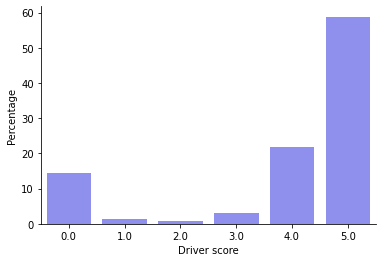

In [31]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine() 
plt.show() 

Посмотрим на оценки клиентов водителями

In [32]:
rider_score_counts = (
    taxi
    .rider_score
    .value_counts(normalize=True)
    .mul(100)
    .round(6)
    .reset_index()
    .rename(columns={'index':'rider_score', 'rider_score':'percentage'})
    .sort_values('rider_score')
)

rider_score_counts

,rider_score,percentage
2,0.0,2.287199
4,1.0,0.207927
5,2.0,0.194932
3,3.0,1.384016
1,4.0,8.830409
0,5.0,87.095517


Строим график для оценок клиентов

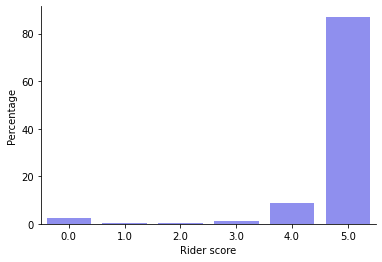

In [33]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()
plt.show() 

Похоже, что клиенты меньше удовлетворены водителями, так как при оценивании водителей оценок ниже 5 баллов оказалось больше 

In [ ]:
Отфильтруем данные и оставим наблюдения со статусом заказа "asap" и "reserved" (start_type)

In [38]:
taxi.query('start_type == "asap" or start_type == "reserved"')

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


In [39]:
taxi.shape

(23111, 19)

In [95]:
taxi.start_type.value_counts()

asap        14865
reserved     8226
delayed        20
Name: start_type, dtype: int64

Посчтаем разницу между временем подачи машины и временем заказа в минутах

In [96]:
# Считаем разницу
taxi['wait_time'] = taxi['arrived_at'] - taxi['start_at']

In [97]:
# Переводим в минуты
taxi.wait_time.astype('timedelta64[m]')

0        18.0
1         NaN
2         NaN
3         NaN
4        -5.0
         ... 
23106     0.0
23107    13.0
23108     9.0
23109    -7.0
23110     NaN
Name: wait_time, Length: 23111, dtype: float64

In [46]:
# Альтернативный вариант кода
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')

In [47]:
taxi['wait_time']

0        18.0
1         NaN
2         NaN
3         NaN
4        -5.0
         ... 
23106     0.0
23107    13.0
23108     9.0
23109    -7.0
23110     NaN
Name: wait_time, Length: 23111, dtype: float64

In [48]:
# 9.1) ⭐️Задание со звёздочкой!⭐️
# Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved').
#Опозданием считается время ожидания wait_time > 0.0.
# Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, 
#который опоздал на заказ интересующего нас типа наибольшее число раз

In [49]:

# лУчше без сортировки так как она занимает много времени как алгоритм , а функция макс занимает мало времени
c = taxi.query('start_type == "reserved" and wait_time > 0') \
    .groupby('driver_id') \
    .agg({'user_id': 'count'}).idxmax()

In [50]:
c

user_id    406921adcca37705ef527b4246c0cfea
dtype: object

In [51]:

taxi.query('start_type == "reserved" and wait_time > 0') \
    .groupby('driver_id', as_index=False) \
    .agg({'user_id': 'count'}).sort_values('user_id')

,driver_id,user_id
88,d7bf644eb441cda6127f91addebb85c4,1
71,b68895736389f2949faa8c73555b81ac,1
66,b5821eaaa5d49fb2936ff5b0ffa34a35,1
64,b44159c128d31f55629260b671ab83ac,1
58,9db6243faff23197787d1efc5f93904d,1
...,...,...
77,c814db2127582cf95dea1f74f43127c2,45
29,56f59b58bcbbd1cdabc3652e713134c2,51
93,ec84a73745199ff840ecafcb924383ad,57
86,d665fb9f75ef5d9cd0fd89479380ba78,59


In [52]:
# второй вариант короче, можно без групбай,просто написать колонку драйвер айди и тогда автом отберутся те водит кот опаздывали
taxi.query('start_type == "reserved" and wait_time > 0') \
    .driver_id.value_counts().idxmax()

'406921adcca37705ef527b4246c0cfea'

In [53]:
taxi.query('start_type == "reserved" and wait_time > 0 and driver_id == "406921adcca37705ef527b4246c0cfea"')

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
67,eb06449983dd990ff162c0ad990909ba,933a5cf7834b12121755b8586b53a083,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-06-01 22:00:00,"-12,12078476","-76,97079468",2010-06-01 22:42:00,"-12,07870483","-77,06329346",drop off,"-12,11143646","-76,99240794",2010-06-01 22:01:00,iPhone,4.0,5.0,1.0
197,275052e660ff5672db6624c42b6b4f59,29a360323f1754d8cf08023eb1f3dbb7,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-05-02 18:30:00,"-12,08666992","-76,9319458",2010-05-02 19:19:00,"-12,10585403","-77,03704834",drop off,"-12,12186052","-77,02913578",2010-05-02 18:33:00,iPhone,5.0,5.0,3.0
434,c32c353f4a9bc8ae2e079e6bb7cb9366,0280ac72b104d8a55d2d23d5321b665f,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-11-21 17:45:00,"-12,13144684","-77,02966309",2010-11-21 18:04:00,"-12,08789444","-77,01257324",drop off,"-12,12120876","-77,03697602",2010-11-21 17:48:00,iPhone,NaN,5.0,3.0
1055,bb3af86cd1cc8948a514796d363f9dce,0a98cead98f3935ef3051e834a30419e,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-03-03 22:00:00,"-12,783333","-76,566667",2010-03-04 00:35:00,"-12,1005158","-76,9931074",drop off,"-12,3908164","-76,76675939",2010-03-03 22:06:00,web,NaN,NaN,6.0
1067,6f2fdf6e4148cb011614ac61629d2c6d,8e37a68fab5f31a5e2c1b5f77c6bb9e5,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-03-12 01:50:00,"-12,023261","-77,098282",2010-03-12 03:33:00,"-12,091879","-77,024572",drop off,"-12,07427538","-77,0851266",2010-03-12 02:48:00,web,NaN,NaN,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21522,1881c928349fa432c4c0cb4434802c81,16cbe35db7fff70fbc8251b4cdc843b1,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,reserved,2010-10-23 15:00:00,"-12,0828829","-76,9315111",2010-10-23 16:13:00,"-12,0600981","-77,1370233",drop off,"-12,09773921","-77,01999544",2010-10-23 15:03:00,web,5.0,5.0,3.0
21661,2254715f0f569e3173ec61f16cdcc1e6,86aa09456b63a2a25e0097c5520497ec,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,reserved,2010-08-09 15:00:00,"-12,0167023","-76,8515593",2010-08-09 15:42:00,"-12,0959378","-77,0375891",drop off,"-12,04726631","-76,94286792",2010-08-09 15:06:00,web,NaN,5.0,6.0
21890,2f1882c87731970df63e69d4bc2515da,68fe4d0ad82cc2d715d131953336d717,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,reserved,2010-07-10 20:45:00,"-12,0868345","-77,0100778",2010-07-10 21:40:00,"-12,1198424","-77,0302427",drop off,"-12,08746273","-77,00995593",2010-07-10 21:17:00,web,NaN,5.0,32.0
22378,5111ac6114962976d7fd625788b072ca,0a98cead98f3935ef3051e834a30419e,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,reserved,2010-10-06 17:00:00,"-12,1005158","-76,9931074",2010-10-06 19:29:00,"-12,0948156","-76,7567368",drop off,"-12,11746653","-76,98470932",2010-10-06 17:01:00,web,NaN,NaN,1.0


In [54]:

# 11) ⭐️Задание со звёздочкой!⭐️
# Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at),
# как номер, и столбец weekday – название дня недели. 

In [55]:

taxi['month'] = taxi.start_at.dt.month

taxi['month']

0        11
1         6
2         5
3         6
4         9
         ..
23106     7
23107    10
23108     9
23109     4
23110     3
Name: month, Length: 23111, dtype: int64

In [56]:
taxi.start_at.dt.month_name()

0         November
1             June
2              May
3             June
4        September
           ...    
23106         July
23107      October
23108    September
23109        April
23110        March
Name: start_at, Length: 23111, dtype: object

In [57]:
taxi['weekday'] = taxi.start_at.dt.day_name()


In [58]:
taxi['weekday'] = taxi.start_at.dt.strftime('%A')

taxi['weekday']

0         Tuesday
1         Tuesday
2          Monday
3         Tuesday
4        Saturday
           ...   
23106    Saturday
23107    Saturday
23108     Tuesday
23109    Thursday
23110     Tuesday
Name: weekday, Length: 23111, dtype: object

In [59]:

# Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 
# Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8). 


In [60]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,...,drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0,0.0,7,Saturday
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,...,drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0,13.0,10,Saturday
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,...,drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0,9.0,9,Tuesday
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,...,drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0,-7.0,4,Thursday


In [61]:
taxi.month.value_counts()


12    3313
10    3240
11    3021
9     2598
8     2120
6     1939
5     1585
7     1516
4     1448
3      986
2      770
1      575
Name: month, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


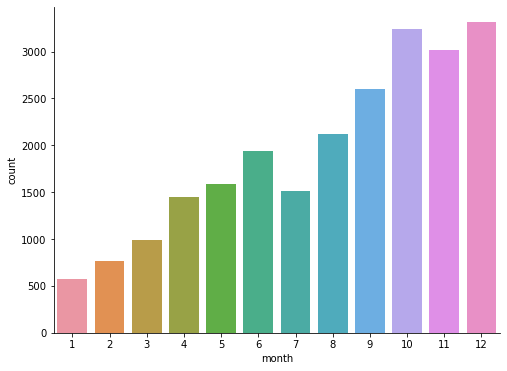

In [62]:
plt.figure(figsize=(8,6))
sns.countplot(taxi.month)
sns.despine()


In [63]:
# А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, 
# которому нужно передать список названий в нужном порядке. Например: 
# sns.countplot(data['column'], order=['One', 'Two', 'Three'])
# Вопрос: в какой день недели суммарно поступило меньше всего заказов?


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


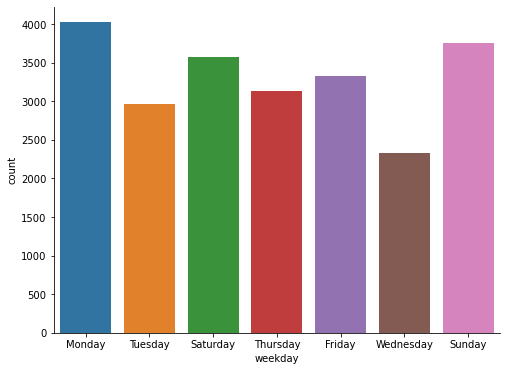

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(taxi.weekday, order=['Monday', 'Tuesday', 'Saturday', 'Thursday', 'Friday', 'Wednesday', 'Sunday'])
sns.despine()


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


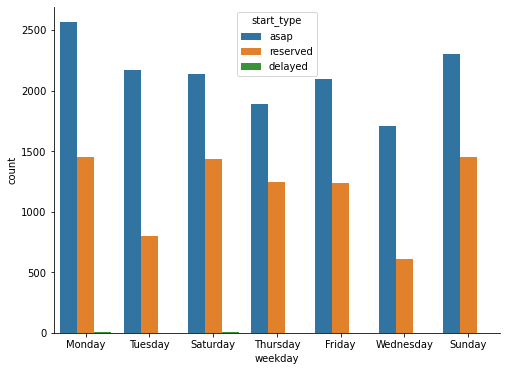

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot('weekday', data=taxi, order=['Monday', 'Tuesday', 'Saturday', 'Thursday', 'Friday', 'Wednesday', 'Sunday'], hue='start_type')
sns.despine()

In [66]:
# Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:
# DAU (daily active users) – число уникальных пользователей за день
# WAU (weekly active users) – число уникальных пользователей за неделю
# MAU (monthly active users) – число уникальных пользователей за месяц
# Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU и выберите верные утверждения. 
# Могут пригодиться:
# groupby – группировка
# nunique – число уникальных значений
# plot.line – линейная диаграмма

In [82]:
MAU = taxi.groupby('month').agg({'user_id': 'nunique'})

<AxesSubplot:xlabel='month'>

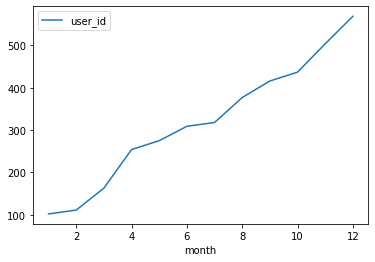

In [83]:
MAU.plot()

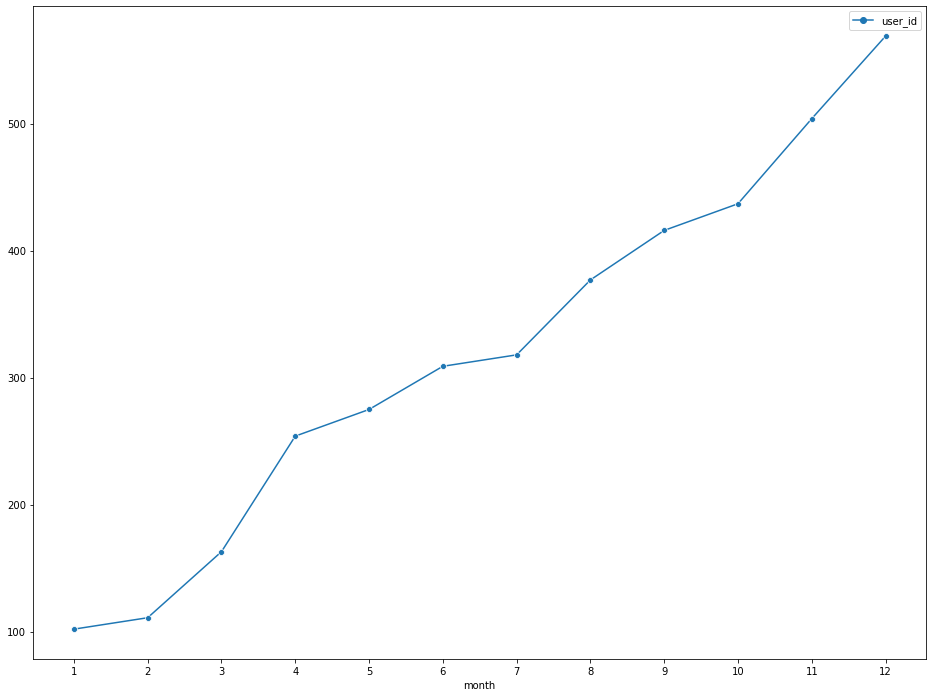

In [85]:
xticks = range(1, 13)
plt.figure(figsize=(16, 12))
sns.lineplot(data=MAU, markers='o')
plt.xticks(xticks);

In [90]:
taxi['day'] = taxi.start_at.dt.day


In [91]:
# dau - daily active users
dau = taxi.groupby(['month', 'day'], as_index=False) \
      .agg({'user_id': 'nunique'})



In [92]:
dau['day_of_year'] = range(1,366)

dau

,month,day,user_id,day_of_year
0,1,1,4,1
1,1,2,6,2
2,1,3,6,3
3,1,4,8,4
4,1,5,4,5
...,...,...,...,...
360,12,27,51,361
361,12,28,42,362
362,12,29,22,363
363,12,30,31,364


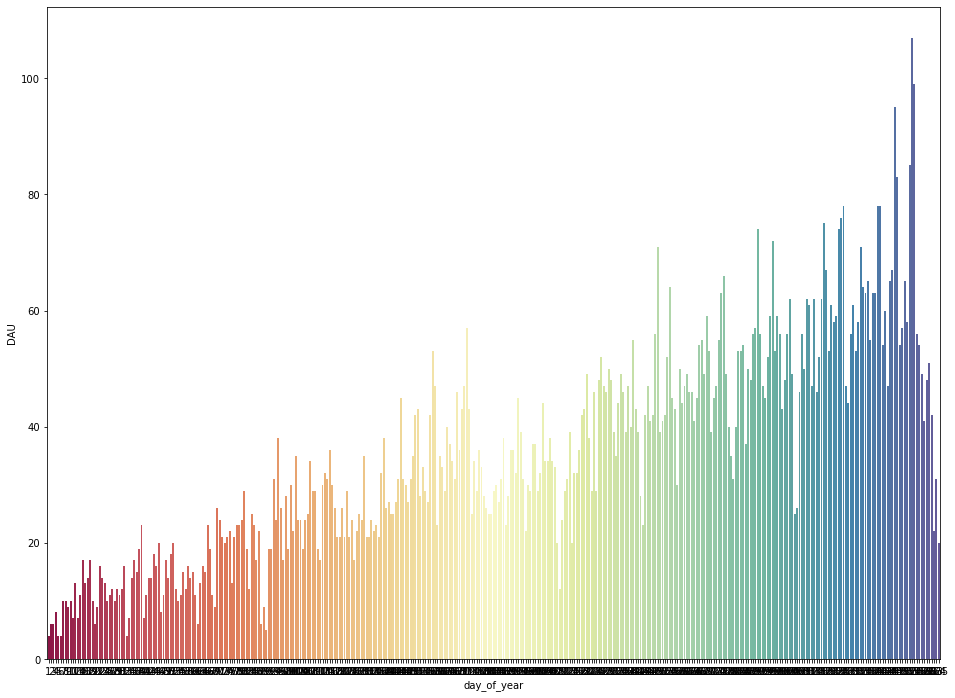

In [94]:
plt.figure(figsize=(16, 12))
ax = sns.barplot(x='day_of_year', y='user_id', data=dau, palette='Spectral')
ax.set(ylabel='DAU');